# [Phystech@DataScience](https://thetahat.ru/courses/ph-ds-2025-spr)
## Домашнее задание 4

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейках, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  20 баллов
* Задача 2 &mdash;  40 баллов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  60 баллов

-----

In [1]:
# Bot check

# HW_ID: phds_hw4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder


sns.set_theme(style='whitegrid', font_scale=1.3, palette='Set2')

## <b><font color="blue">Легкая часть</font></b>

---
### Задача 1.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 5de604f9bb099de3e197a8aa7e002d24 -->
Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте и поясните свой ответ на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно с признаком $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

1) Монотонные функции никак не улучшают и не ухудшают обучающую способность дерева, так как если, например для двух признаков $x_j, x_i$ верно, что $x_j > x_i$, то, для, например, возрастающей функции $f$ будет выполнено $f(x_j) > f(x_i)$. Если же функция $f$ убывающая, то в каждом узле произойдёт просто "перестановка" листьев дерева (лист, отвечающий условию $x_j > c$ поменяется местами с листом $x_j < c$), но обучающая способность дерева не изменится.
2) Немонотонные функции могут случайным образом изменить распределение объектов внутри различных листьев, структура дерева непредсказуема изменится, поэтому их лучше не использовать.
3) Линейные преобразования с признаками различных размерностей могут всерьез исказить дерево, его структура изменится.
4) Также, как в случае немонотонных функций, дерево может непредсказуемо измениться.
5) Никак не влияет на структуру дерева
6) Необходимо делать, так как дерево работает с числовыми признаками, и если признаки не числовые, то их нужно перевести в числа.

---
### Задача 2
<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->

### 1. Загрузка и предобработка данных.
### *Профиль физика*



Скачайте [данные](https://www.kaggle.com/datasets/sayansh001/crystal-structure-classification) по классификации кристаллических решеток. Целевой переменной в этой задаче является `Lowest distortion`.



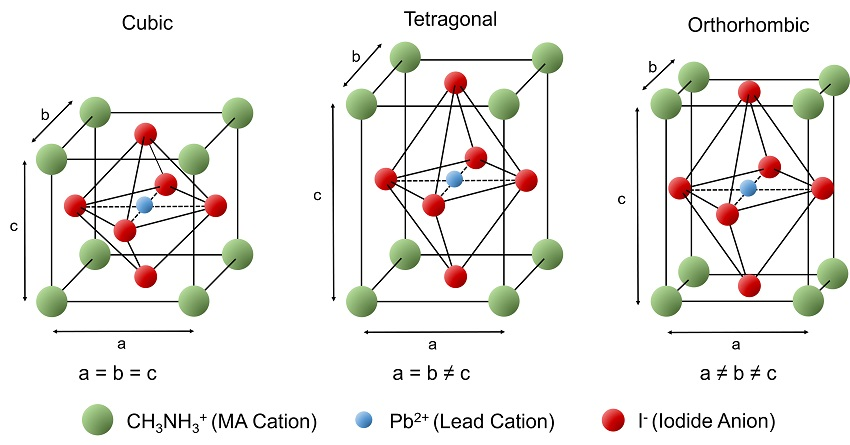


Каждое наблюдение описывается 13 столбцами признаков и 1 столбцом класса, который идентифицирует его как кубическую, тетрагональную, ромбическую или ромбоэдрическую структуру. Наборы признаков - различные параметры кристаллической решетки, такие как валентность, ионный радиус, среднее значение электроотрицательности, постоянная решетки, а так же энергия, которая численно равна работе, которую необходимо затратить, чтобы разделить и отделить друг от друга на бесконечное расстояние частицы.

In [3]:
data = pd.read_csv("Crystal_structure.csv")
data

,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,5.228952455,0.442857,cubic
5325,ZrYO3,Zr,Y,False,-,-,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,-,0.642857,cubic
5326,ZrYbO3,Zr,Yb,False,-,-,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,-,0.678571,orthorhombic
5327,ZrZnO3,Zr,Zn,False,-,-,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,-,0.528571,cubic


Сделаем предобработку данных.

In [4]:
# уберем признаки, которые нам не нужны
data = data.drop(["In literature", "Compound", "τ"], axis=1)

# убираем объекты, для которых неизвестен таргет
data = data.drop(data[data["Lowest distortion"] == "-"].index).reset_index(drop=True)

# закодируем целевую переменную числами
data['Lowest distortion'] = LabelEncoder().fit_transform(data['Lowest distortion'])

# закодируем категориальные признаки числами
data['A'] = LabelEncoder().fit_transform(data['A'])
data['B'] = LabelEncoder().fit_transform(data['B'])

# Заполним пропуски нулями
for i in data.columns:
    column = data[i]
    for k in range(len(column)):
        if column[k] == '-':
            column[k] = 0
    data[i] = column

C:\Users\maksa\AppData\Local\Temp\ipykernel_292\856284401.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[k] = 0
C:\Users\maksa\AppData\Local\Temp\ipykernel_292\856284401.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[k] = 0
C:\Users\maksa\AppData\Local\Temp\ipykernel_292\856284401.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[k] = 0
C:\Users\maksa\AppData\Local\Temp\ipykernel_292\856284401.py:19:

### *Профиль биология*

В этом [наборе данных](https://www.kaggle.com/datasets/arezaei81/heartcsv) содержится различная информация о пациентах, включая возраст, пол, артериальное давление, уровень холестерина, электрокардиографические характеристики (ЭКГ) и многое другое. Целевой характеристикой является `target` - наличие у пациента сердечного заболевания.



Информация о наборе данных:

1. **age**: Возраст пациента.
2. **sex**: Пол пациента (0: женский, 1: мужской).
3. **cp**: Тип боли в груди.
4. **trestbps**: Артериальное давление в состоянии покоя.
5. **chol**: уровень холестерина в сыворотке крови.
6. **fbs**: Быстрый сахар крови > 120 мг/дл.
7. **restecg**: Результаты электрокардиографии в состоянии покоя.
8. **thalach**: Максимальная достигнутая частота сердечных сокращений.
9. **exang**: Стенокардия, вызванная физической нагрузкой.
10. **oldpeak**: Депрессия ST, вызванная физической нагрузкой по сравнению с покоем.



In [5]:
heart = pd.read_csv('heart.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

### 2. Обучение модели


Создайте массив признаков и вектор таргета.

In [5]:
X = data.drop(columns='Lowest distortion')
y = data['Lowest distortion']


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7b76f2eaef8112a7ca4d80bccfb88090 -->

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Обучите модель решающего дерева.

In [7]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Сделайте предсказание для тестовой выборки.

In [8]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Посчитайте точность предсказания

In [9]:
accuracy_score(y_test, y_pred)

0.6999368288060644

Повторите все шаги для случайного леса. Лес &mdash; много похожих, но всё же отличающихся деревьев. Такая модель делает предсказание, усредняя ответы отдельных деревьев. Подробнее мы рассмотрим эту модель в осенней части курса, а пока просто воспользуйтесь готовым классом [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Сравните полученные результаты.

In [10]:
new_model = RandomForestClassifier()
new_model.fit(X_train, y_train)
y_new_pred = new_model.predict(X_test)
accuracy_score(y_test, y_new_pred)

0.7751105495893872

**Выводы:** Видим, что модель случайно леса даёт несколько лучшие результаты (точность предсказания выше на $\approx$ 10 %). Видимо, лучшие результаты модели леса связаны с усреднением по множеству моделей аналогичных деревьев (ансамблированием).

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
## <b><font color="orange">Сложная часть</font></b>
---
### Задача 3
### 1. Загрузка данных
### *Профиль физика*

Рассмотрим <a href='https://archive.ics.uci.edu/dataset/291/airfoil+self+noise' target="_blank">набор данных NASA </a>, он включает в себя аэродинамические профили NASA-0012 разных размеров при различных параметрах в аэродинамической трубе и углах атаки. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. Целевой переменной будет scaled-sound-pressure: это звуковое давление в определенной части лопасти, распределение этой величины показано на втором рисунке. Данная задача, конечно, имеет почти аналитическое решение, однако оно занимает довольно много времени и ресурсов. Мы хотим продемострировать возможность использования методов машинного обучения для быстрых и довольно точных численных оценок.



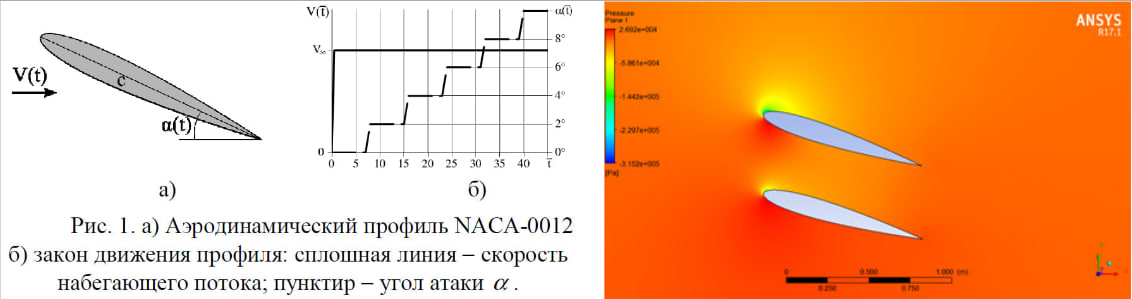

In [11]:
column_names = ['frequency', 'attack-angle', 'chord-length', 'free-stream-velocity', "suction-side-displacement-thickness", "scaled-sound-pressure"]
df = pd.read_csv("airfoil_self_noise.dat", sep='\t', names=column_names)

In [14]:
df = df.rename(columns={'scaled-sound-pressure': 'target'})
df = df.sample(frac=1).reset_index(drop=True)

In [43]:
X = df.drop('target',axis=1)
y = df[['target']]

In [16]:
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

### *Профиль биология*

[Данные](https://archive.ics.uci.edu/dataset/1/abalone). Будем предсказывать возраст моллюсков.

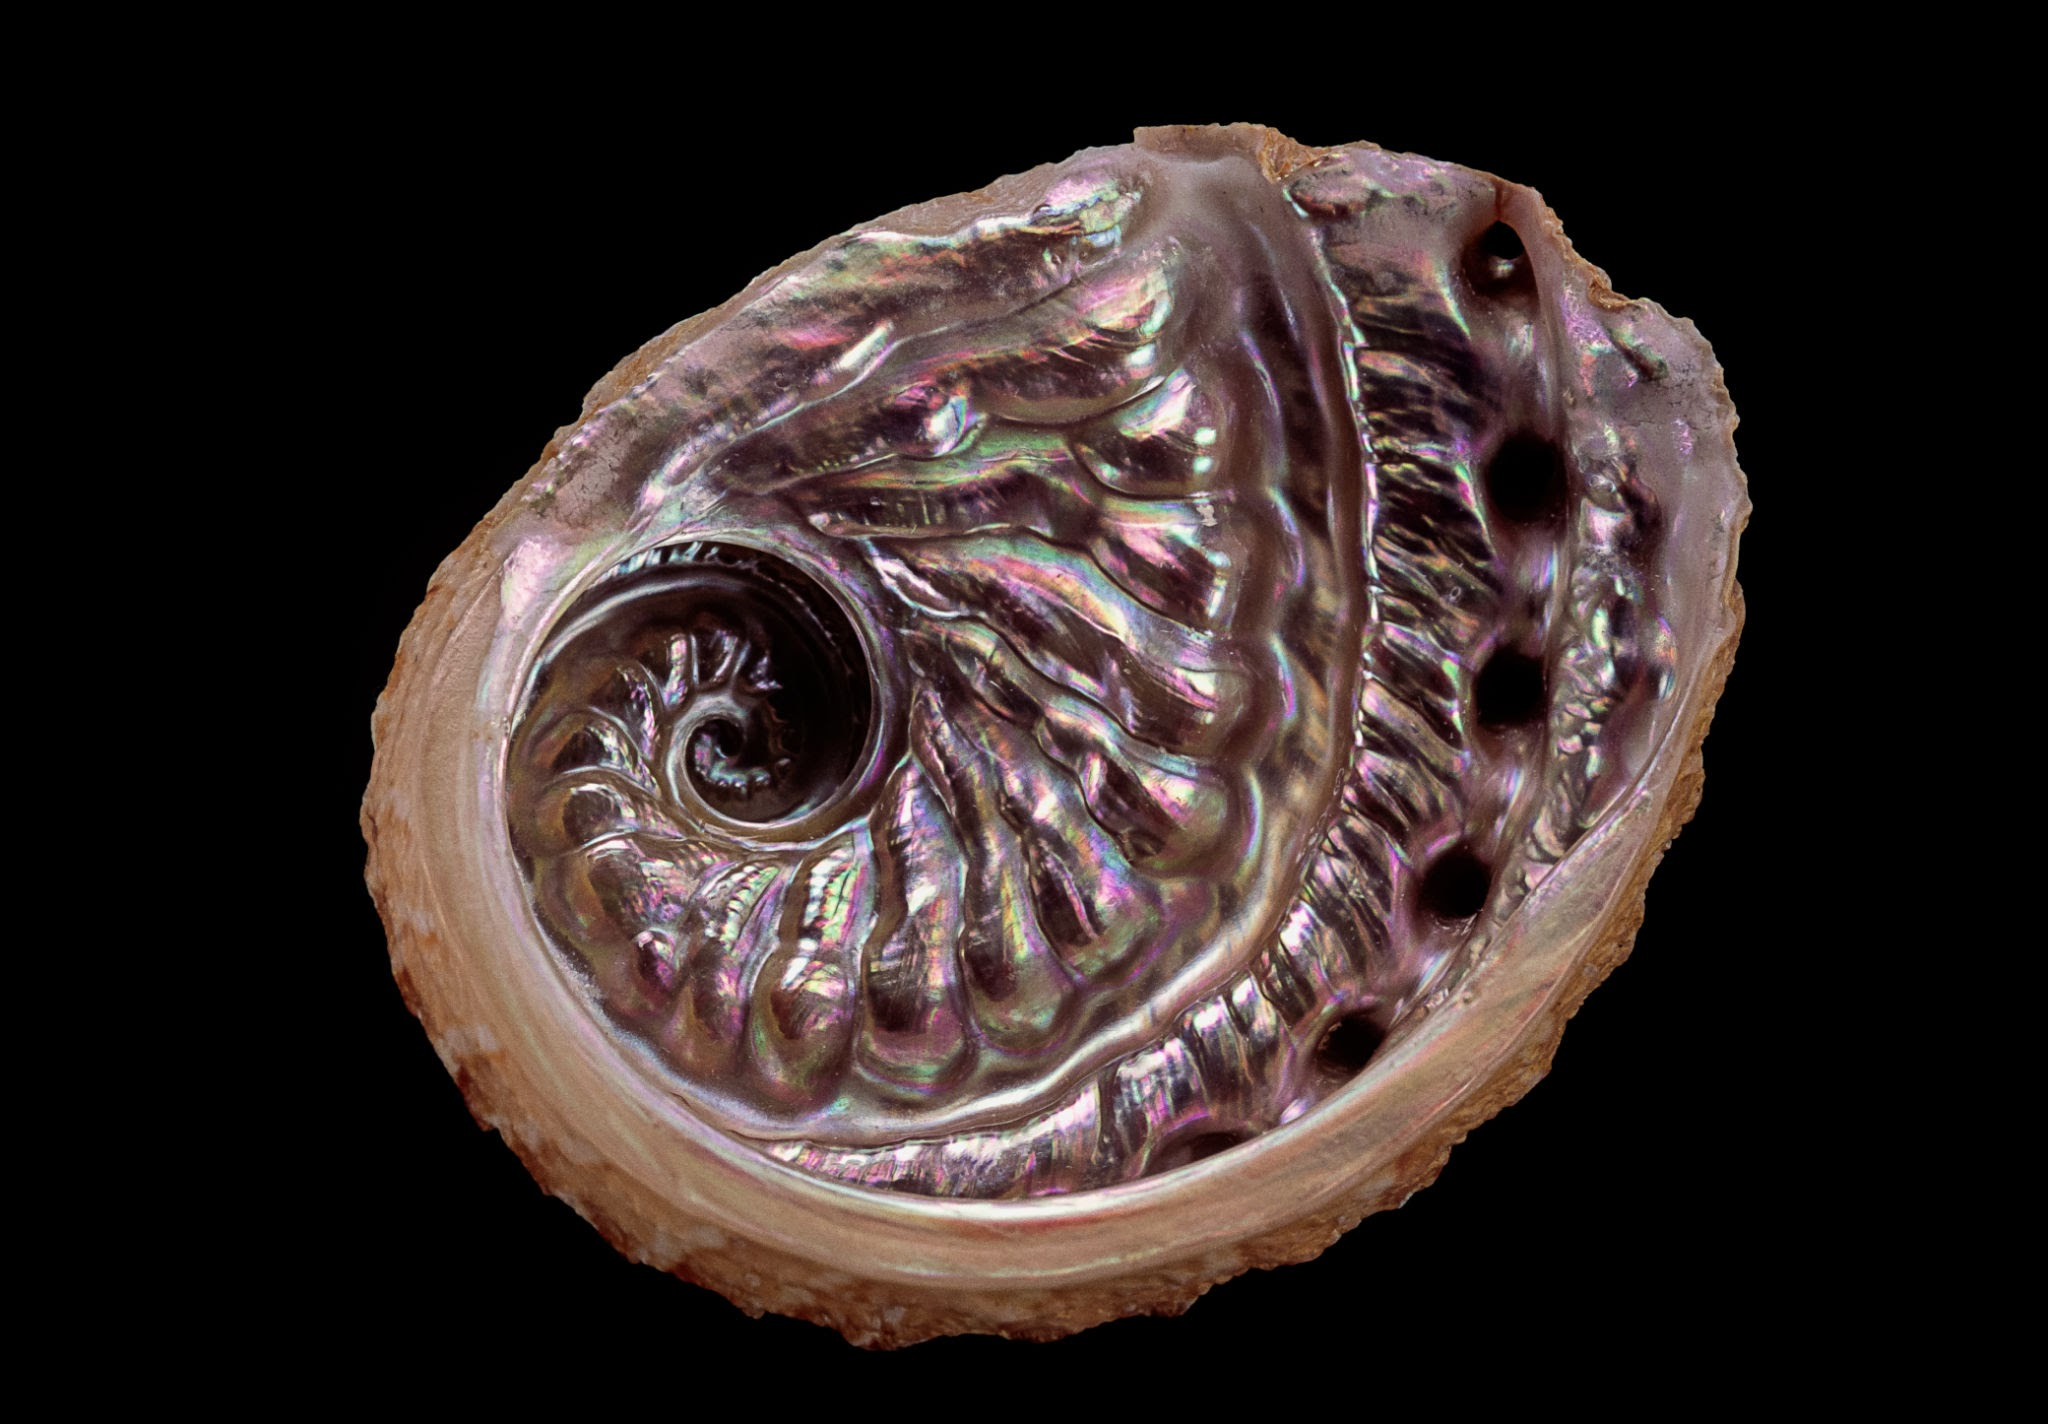

In [11]:
data = pd.read_csv('abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                                          'Shucked weight', 'Viscera weight', 'Shell weight',
                                          'Rings'])

FileNotFoundError: [Errno 2] No such file or directory: 'abalone.data'

In [ ]:
data = data.drop('Sex', axis=1)
X = data.drop('Rings', axis=1)
y = data['Rings'] + 1.5

In [ ]:
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, test_size = 0.2, random_state=42)

Обратите внимание: мы разбили выборку на 3 подмножества: обучающая, валидационая и тестовая. Внимательно следите за указаниями, где и какую подвыборку использовать.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2d266ec841ddb9ba6809fe22dfbf4b89 -->
### 2. Обучение модели

Обучите решающее дерево глубины 3 и визуализируйте его.

*Рекомендуется сделать скриншот визуализации и прислать его в бот вместе с ноутбуком.*

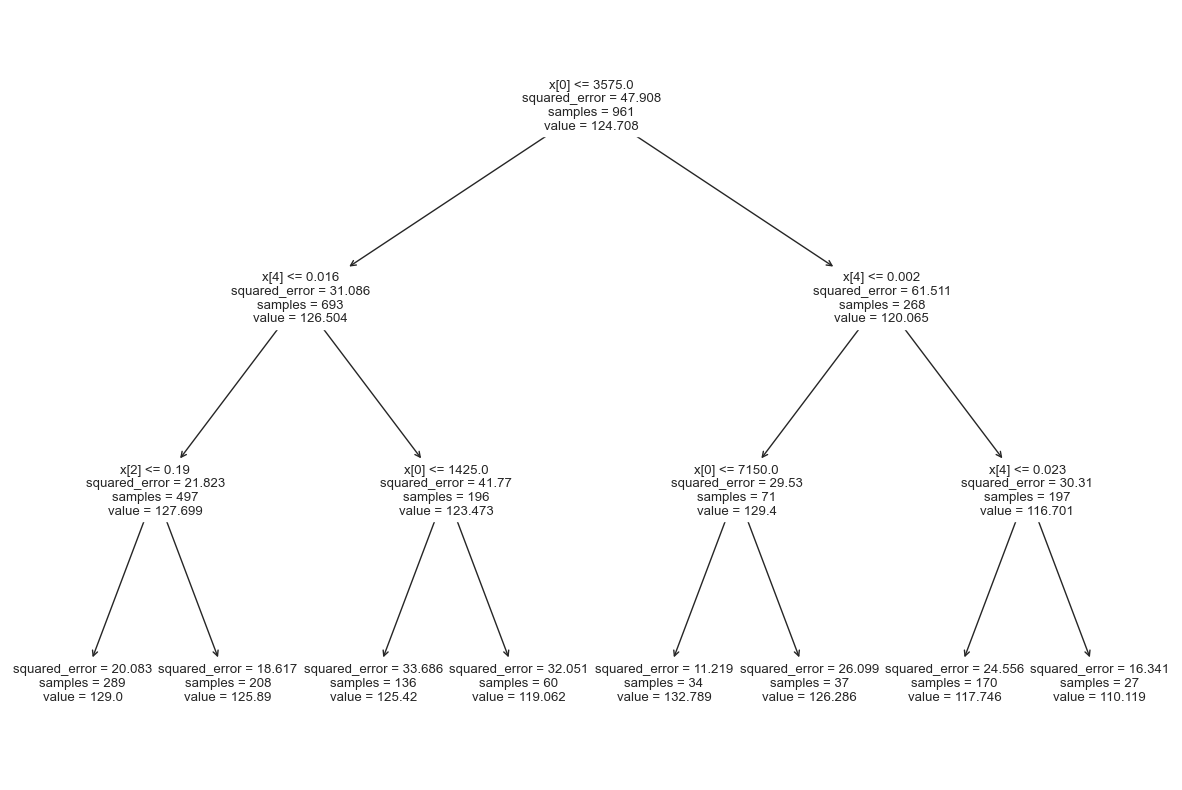

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score
Tree_depth_3 = DecisionTreeRegressor(max_depth=3, random_state=42)
Tree_depth_3.fit(X_train, y_train)
plt.figure(figsize=(15, 10))
tree.plot_tree(Tree_depth_3)
plt.show()

Посчитайте выбранную метрику на валидационной выборке (**не на тестовой**)

In [18]:
r2_score(y_valid, Tree_depth_3.predict(X_valid))

0.3849837802654137

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3486f771ea381ccfaae782b06ebc8020 -->
Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график - зависимость ошибки от максимальной глубины дерева. Подробнее про гиперпараметры смотрите в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

Text(0, 0.5, 'r2')

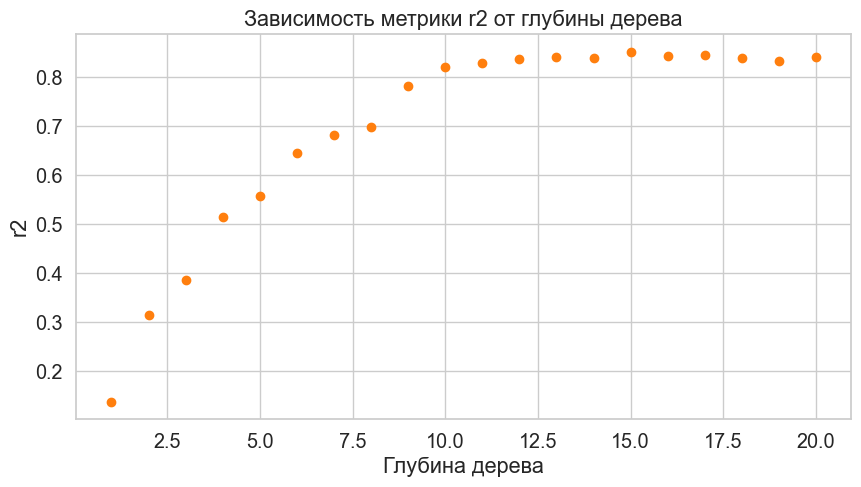

In [19]:
depths = [i for i in range(1,21)]
depth_scores = []
for _ in depths:
    model = DecisionTreeRegressor(max_depth = _)
    model.fit(X_train, y_train)
    depth_scores.append(r2_score(y_valid, model.predict(X_valid)))
plt.figure(figsize=(10,5))
plt.scatter(depths, depth_scores, color = 'tab:orange')
plt.title("Зависимость метрики r2 от глубины дерева")
plt.xlabel('Глубина дерева')
plt.ylabel('r2')

Видим, что оптимальное значение параметра max_depth равно 11.

In [20]:
best_depth = 11

Аналогичным образом подберите минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться, зафиксировав при этом подобранное значение максимальной глубины. Для минимального числа объектов в листе и максимального числа признаков, по которым ищется лучшее разбиение в дереве, подберите аналогично, фиксируя лучшие значения гиперпараметров, подобранные на предыдущем шаге.

Text(0, 0.5, 'r2')

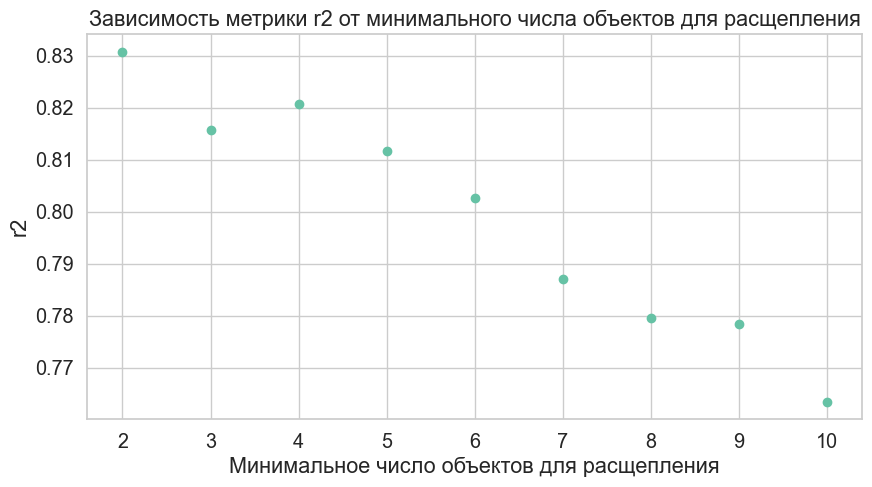

In [21]:
min_objects_for_split = range(2,11)
split_scores = []
for split in min_objects_for_split:
    model = DecisionTreeRegressor(max_depth=best_depth, min_samples_split=split)
    model.fit(X_train, y_train)
    split_scores.append(r2_score(y_valid, model.predict(X_valid)))
plt.figure(figsize=(10,5))
plt.scatter(min_objects_for_split, split_scores)
plt.title('Зависимость метрики r2 от минимального числа объектов для расщепления')
plt.xlabel('Минимальное число объектов для расщепления')
plt.ylabel('r2')



In [22]:
best_min_samples_split = 2

Text(0, 0.5, 'r2')

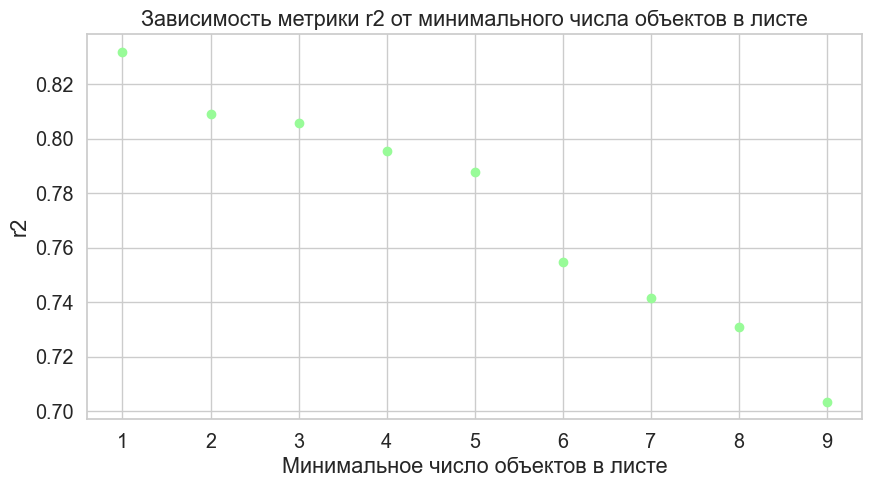

In [23]:
leaf_samples = range(1,10)
leaf_scores = []
for leaf in leaf_samples:
    model = DecisionTreeRegressor(max_depth=best_depth, min_samples_split=best_min_samples_split, min_samples_leaf=leaf)
    model.fit(X_train, y_train)
    leaf_scores.append(r2_score(y_valid, model.predict(X_valid)))
plt.figure(figsize=(10,5))
plt.scatter(leaf_samples, leaf_scores, color = 'palegreen')
plt.title('Зависимость метрики r2 от минимального числа объектов в листе')
plt.xlabel('Минимальное число объектов в листе')
plt.ylabel('r2')

In [27]:
best_leaf_samples = 1

Text(0, 0.5, 'r2')

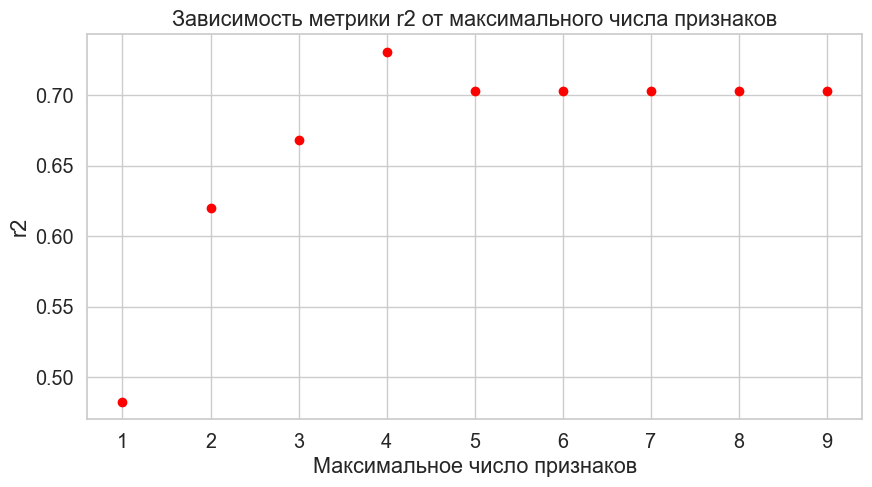

In [28]:
max_features = range(1,10)
feature_scores = []
for feature in max_features:
    model = DecisionTreeRegressor(max_depth=best_depth, min_samples_split=best_min_samples_split, min_samples_leaf=leaf, max_features=feature)
    model.fit(X_train, y_train)
    feature_scores.append(r2_score(y_valid, model.predict(X_valid)))
plt.figure(figsize=(10,5))
plt.scatter(max_features, feature_scores, color = 'red')
plt.title('Зависимость метрики r2 от максимального числа признаков')
plt.xlabel('Максимальное число признаков')
plt.ylabel('r2')

In [29]:
best_max_features = 5

Обучите вашу лучшую модель и сделайте предсказание для тестовой выборки.

In [30]:
My_model = DecisionTreeRegressor(max_depth=best_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_leaf_samples, max_features=best_max_features)
My_model.fit(X_train, y_train)
y_pred = My_model.predict(X_test)
print(f'Точность предсказания:{r2_score(y_test, y_pred)}')

Точность предсказания:0.8578070838896066


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- b68265eef730dbc12b8d7cdf94f97dea -->
Теперь вам предлагается проверить результат своей реализации с уже существующей функцией для оптимизации гиперпараметров - `GridSearchCV`. Эта функция помогает перебирать предопределенные гиперпараметры и подгонять вашу модель к тренировочному набору. Сравните полученные гиперпараметры и если они различаются, объясните почему. Для этого вам может понадобиться [документация](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [31]:
param_grid = {'max_depth':range(1,21),
              'min_samples_split':range(2,11),
              'min_samples_leaf':range(1,10),
              'max_features':range(1,10)}
grid_search_model = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, n_jobs=-1)

grid_search_model.fit(X_train, y_train)
print(grid_search_model.best_params_)

{'max_depth': 18, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


Видимо, подобранные вручную с помощью GridSearchCV параметры отличаются так как GridSearchCV перебирает все $\approx 10^4$ комбинаций параметров, тогда как мы фиксировали оптимальные, подобранные вручную на предыдущем шаге параметры, что менее эффективно. Кроме того, возможно результат GridSearchCV может отличаться за счёт использования кросс-валидации.

Посчитатайте метрику на тестовой выборке и взуализируйте деревья при оптимальных гиперпараметрахдля двух оптимальных моделей - вашей и GridSearchCV.

In [32]:
print(r2_score(y_test, grid_search_model.predict(X_test)))

0.8375091148740927


**Ваша модель**

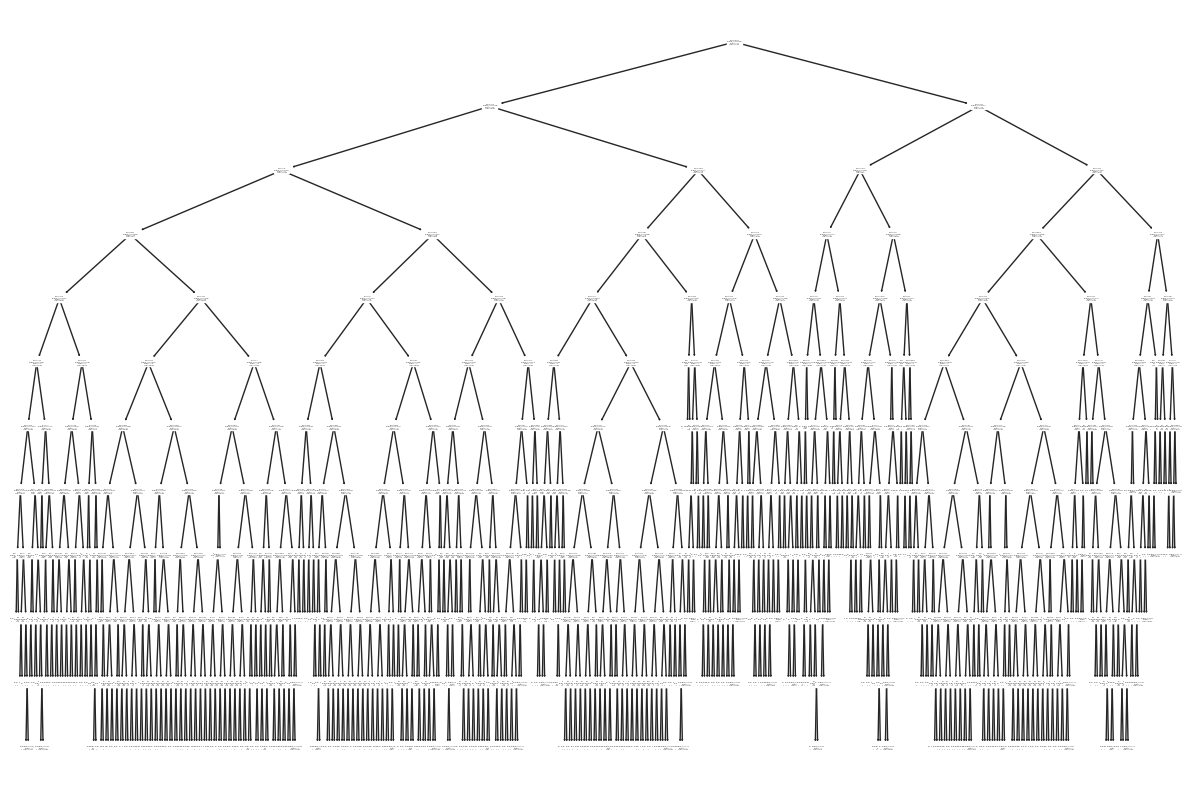

In [33]:
plt.figure(figsize=(15,10))
tree.plot_tree(My_model)
plt.show()


**Лучшая модель по мнению GridSearchCV**

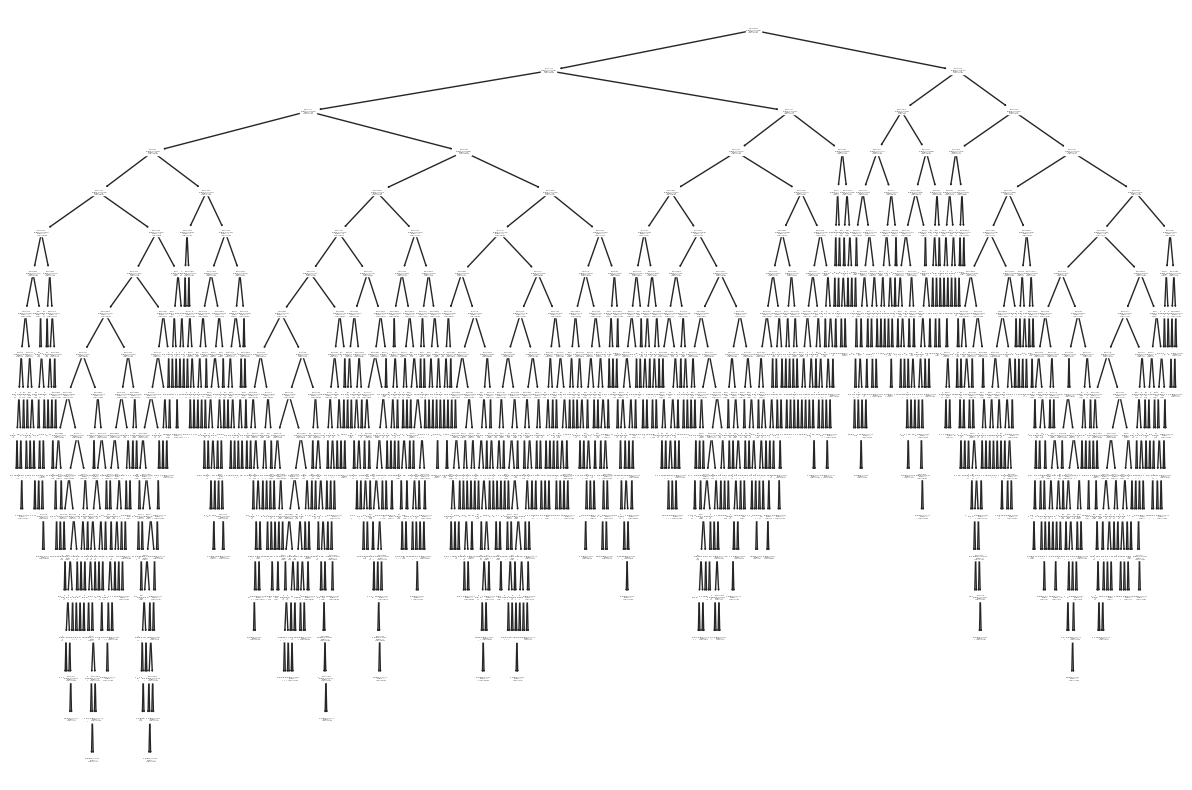

In [34]:
plt.figure(figsize=(15,10))
tree.plot_tree(grid_search_model.best_estimator_)
plt.show()

Решающее дерево позволяет оценить *важность признаков*. Это некоторая величина, зависящая от того,
* насколько часто тот или иной признак использовался при разбиении листа,
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их на одном графике с помощью `seaborn.barplot` для обеих моделей.

In [ ]:
print(f'Значимость признаков моей модели: {My_model.feature_importances_}')
print(f'Значимость признаков GridSearchCV модели: {grid_search_model.best_estimator_.feature_importances_}')

Значимость признаков моей модели: [0.41325319 0.03566919 0.09486965 0.03363315 0.42257482]
Значимость признаков GridSearch модели: [0.42442025 0.07317288 0.08801981 0.04391735 0.37046971]


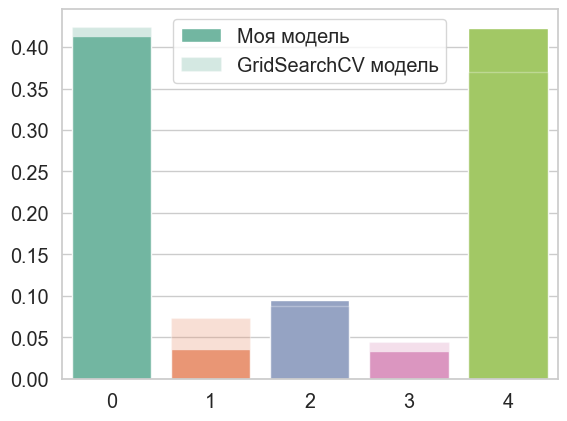

In [60]:
sns.barplot(x=list(range(len(My_model.feature_importances_))), y=My_model.feature_importances_, alpha = 1, label = 'Моя модель')
sns.barplot(x=list(range(len(grid_search_model.best_estimator_.feature_importances_))), y=grid_search_model.best_estimator_.feature_importances_, alpha = 0.3, label = 'GridSearchCV модель')
plt.legend()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 91a021082143a548ae35acdba8c46815 -->
Сделайте выводы. Объясните, согласуется ли логически, почему вес того или иного признака так влияет на целевую переменную.

In [61]:
X

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness
0,630,9.5,0.0254,71.3,0.004207
1,3150,0.0,0.1524,71.3,0.001599
2,2500,8.4,0.0508,55.5,0.005449
3,800,8.4,0.0508,39.6,0.005662
4,2000,3.0,0.3048,39.6,0.004957
...,...,...,...,...,...
1498,12500,0.0,0.2286,71.3,0.002143
1499,630,15.4,0.0508,55.5,0.027193
1500,4000,3.3,0.1016,31.7,0.002514
1501,200,12.3,0.1016,31.7,0.041876


Видим, что наиболее важными признаками являются frequency и suction-side-displacement_thickness. Посмотрим на на относительное стандартное отклонение (отношение стандартного отклонения к среднему значению):

In [66]:
for feature in X.columns:
    print(f'Относительное стандартное отклонение для признака {feature}: {np.std(X[feature])/np.mean(X[feature])}')

Относительное стандартное отклонение для признака frequency: 1.0918602462204712
Относительное стандартное отклонение для признака attack-angle: 0.8722936505802691
Относительное стандартное отклонение для признака chord-length: 0.684810052037663
Относительное стандартное отклонение для признака free-stream-velocity: 0.3060828722117628
Относительное стандартное отклонение для признака suction-side-displacement-thickness: 1.1800718154194376


**Вывод:** Моя модель с вручную подобранными параметрами и GridSearchCV имеют одинаковое распределение значимости признаков, то есть считают наиболее важными одни и те же признаки. По всей видимости, признаки frequency и suction-side-displacement_thickness являются наиболее важными, так как являются наиболее случайными (имеют наибольшее относительное стандартное отклонение, наибольший разброс).

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 13f49c05e0c18821ff968eebb1ee5f94 -->
### 3. Случайный лес

Обучите [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) на 500 деревьев. Остальные параметры оставьте по-умолчанию.

In [36]:
forest_model = RandomForestRegressor(n_estimators=500)
forest_model.fit(X_train, y_train)

c:\Users\maksa\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=500)

Посчитайте метрику на тестовой выборке.

In [37]:
print(r2_score(y_test, forest_model.predict(X_test)))

0.9321486486570532


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- ebef34c62e62274d2f224d0cb10da2ef -->
Визуализируйте важность признаков, используя поле `feature_importances_`.

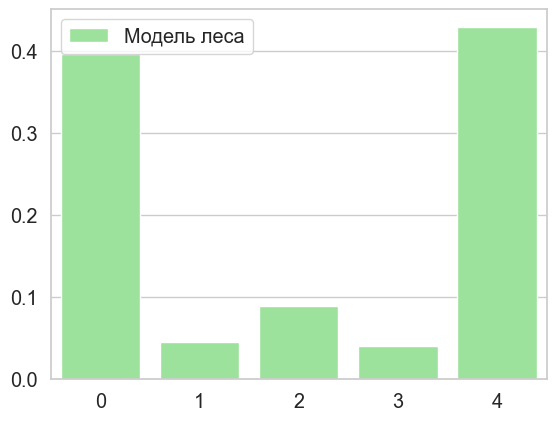

In [67]:

sns.barplot(x=list(range(len(forest_model.feature_importances_))), y=forest_model.feature_importances_, label='Модель леса', color = 'lightgreen')
plt.legend()

Сделайте выводы.

**Вывод:** Случайный лес имеет распределение важности признаков аналогичное модели, подобранной вручную и модели, подобранной с помощью GridSearchCV. Однако случайный лес демонстрирует лучшую точность предсказания по сравнению с обеими ранее рассмотренными моделями, и, кроме того, работает существенно быстрее, чем GridSearchCV.